In [2]:
#import library
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns', None)

# Load and Clean Data

In [3]:
df=pd.read_csv('datasets_84176_195306_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset has no missing values
Show TotalCharges are object data type

In [6]:
#Change DataType of TotalCharges
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

show TotalCharge have 11 nan value 

In [8]:
#Handle nan value in TotalCharge
#TotalCharge  almost equal tenure*MonthCharge
df.TotalCharges.fillna(value = df.tenure *  df.MonthlyCharges, inplace = True)

Now all cols are good for 
Summery Knowledge
tenure: Period in months that customers stay in the company
MonthlyCharge: Value of the monthly payment paid by the customer
TotalCharges: Total amount paid by the customer

# Exploratory Analysis

In [10]:
df.describe().round()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0,7043.0
mean,0.0,32.0,65.0,2280.0
std,0.0,25.0,30.0,2267.0
min,0.0,0.0,18.0,0.0
25%,0.0,9.0,36.0,399.0
50%,0.0,29.0,70.0,1395.0
75%,0.0,55.0,90.0,3787.0
max,1.0,72.0,119.0,8685.0


Half of the clients remain in the company for more than 29 months (just over two years)
The average amount per month $ 30
The average total revenue generated per customer is 2280.

Text(0.5, 1.0, 'Relationship between loyalty months and total revenue')

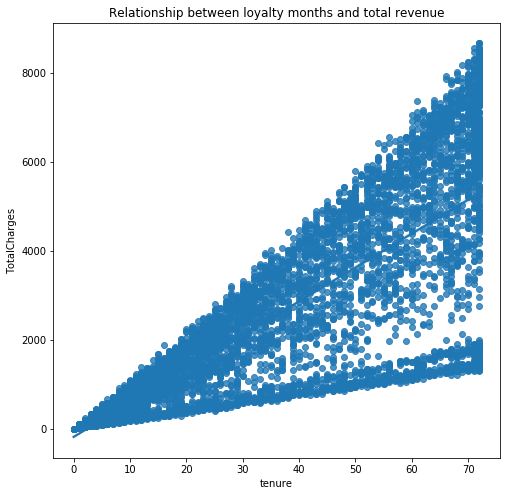

In [12]:
plt.figure(figsize = (8,8))
sns.regplot(x = 'tenure', y = 'TotalCharges', data = df)
plt.title('Relationship between loyalty months and total revenue')

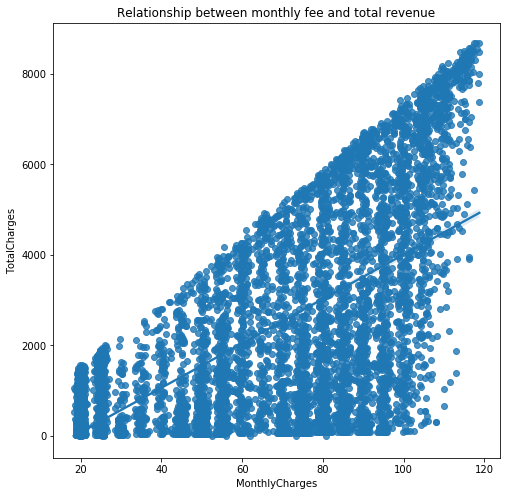

In [13]:
plt.figure(figsize = (8,8))
plt.title('Relationship between monthly fee and total revenue')
ax = sns.regplot(x = 'MonthlyCharges', y = 'TotalCharges', data = df)

<Figure size 1080x720 with 0 Axes>

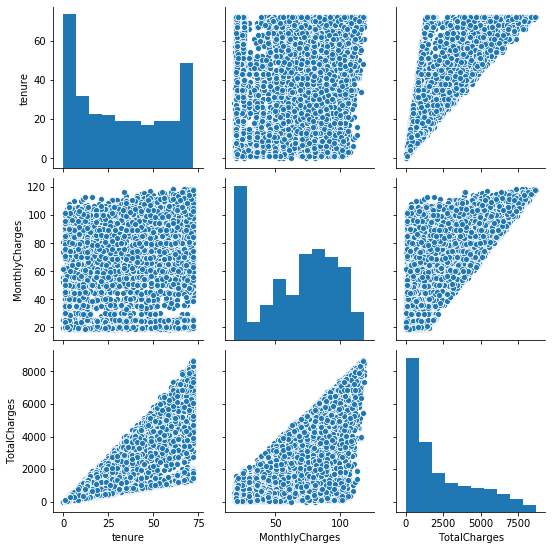

In [14]:
plt.figure(figsize = (15,10))
sns.pairplot(df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']])

Text(0.5, 1.0, 'Box Plot of Total Payments X Months of Loyalty')

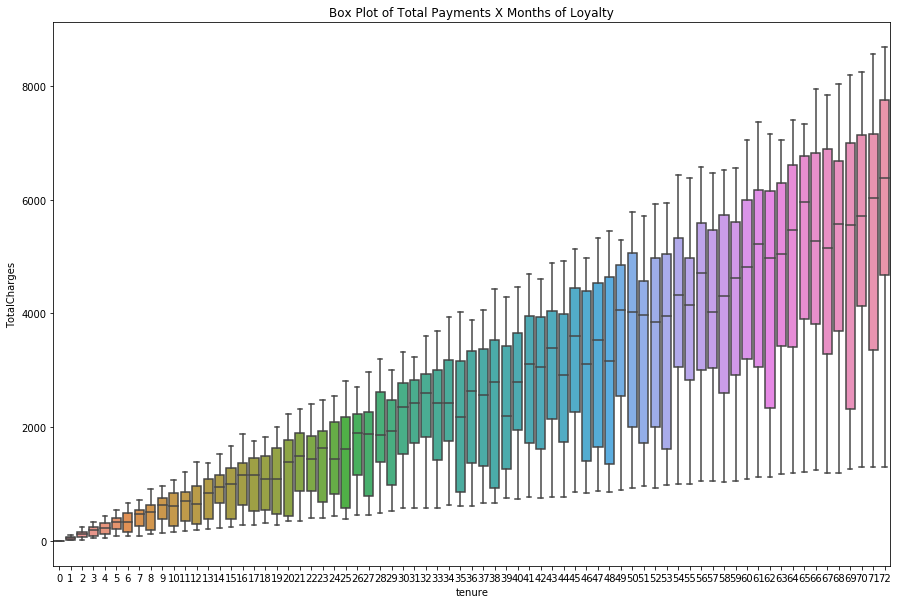

In [15]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'tenure', y = 'TotalCharges', data = df)
plt.title('Box Plot of Total Payments X Months of Loyalty')

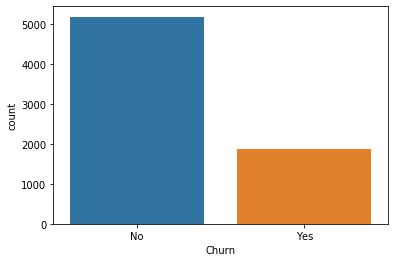

In [17]:
sns.countplot(df.Churn)

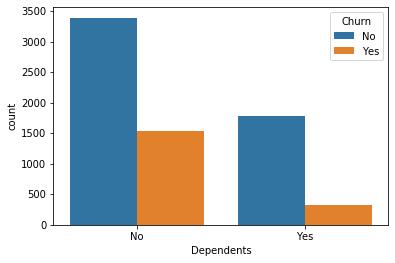

In [18]:
sns.countplot(x=df.Dependents,hue=df.Churn)

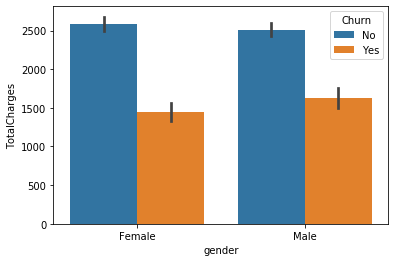

In [19]:
sns.barplot(x=df.gender,y=df.TotalCharges,hue=df.Churn)

The gender doesn't affect the Churn as they approximatley equal

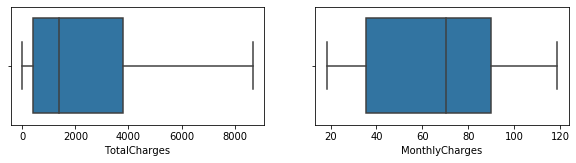

In [20]:
#We could check the ranges of the total and monthly charges
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.boxplot(df.TotalCharges)    
plt.subplot(4,2,2)
sns.boxplot(df.MonthlyCharges) 

The Total charges ranges between 0 and nearly 9000 while the Monthly charges ranges between 15 and 120, but the question is there any relation between them?

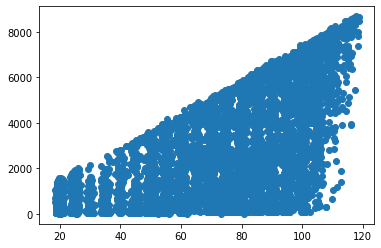

In [21]:
plt.scatter(x=df.MonthlyCharges,y=df.TotalCharges)

In [23]:
df[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651174
TotalCharges,0.651174,1.000000


There is a 65% correlation between them which make sense as the TotalCharges dependant on the monthly charges

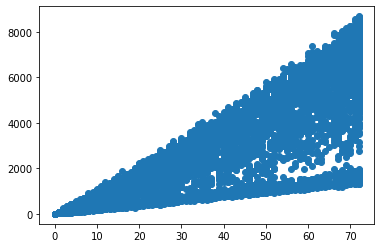

In [26]:
plt.scatter(x=df['tenure'],y=df['TotalCharges'])

In [27]:
df[['tenure','TotalCharges']].corr()

,tenure,TotalCharges
tenure,1.000000,0.826178
TotalCharges,0.826178,1.000000


There is a very strong correlation between them

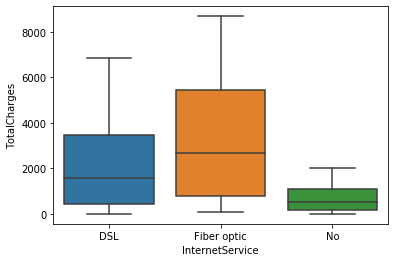

In [28]:
sns.boxplot(df['InternetService'],df['TotalCharges'])

In [29]:
def plott(x,y,df):
    plt.title(x + ' vs ' + y)
    sns.countplot(x=x,hue=y,data=df)

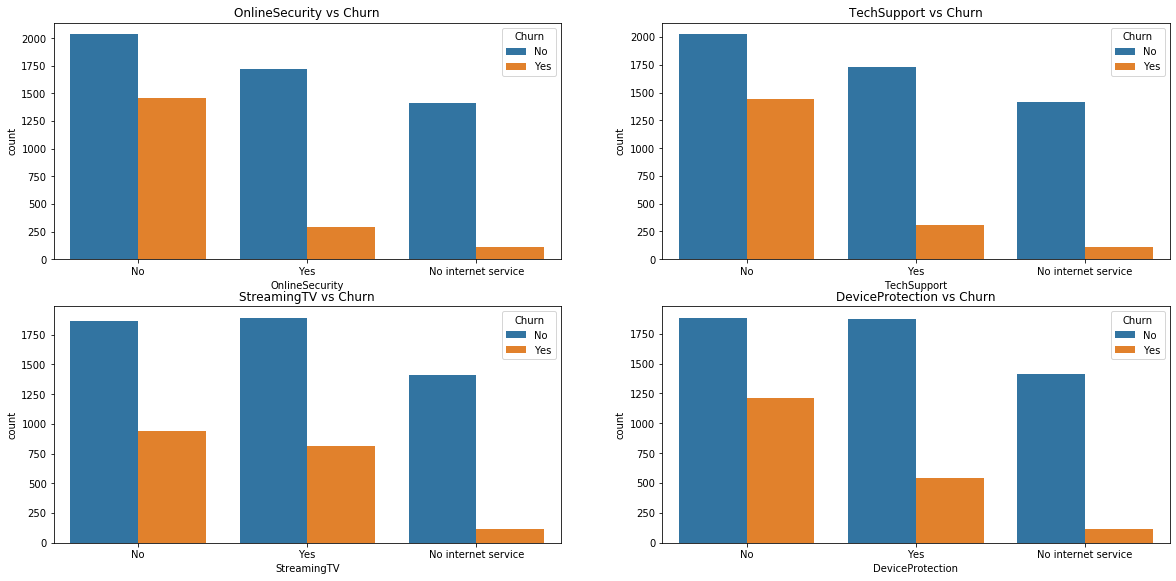

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plott('OnlineSecurity','Churn',df)
plt.subplot(4,2,2)
plott('TechSupport','Churn',df)
plt.subplot(4,2,3)
plott('StreamingTV','Churn',df)
plt.subplot(4,2,4)
plott('DeviceProtection','Churn',df)

Fiber Optics has the largest charges among them, but who leaves from them